#### Prever quanto a pessoa vai ganhar por ano

In [14]:
import pandas as pd
base = pd.read_csv("census.csv")

In [15]:
base.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [16]:
base['income'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [17]:
def converte_classe(rotulo):
    if rotulo == ' >50K':
        return 1
    else:
        return 0

In [18]:
base['income'] = base['income'].apply(converte_classe)

In [19]:
base.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [20]:
base['income'].unique()

array([0, 1])

In [22]:
X = base.drop('income', axis = 1)

In [23]:
X.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [25]:
y = base['income']

In [26]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: income, dtype: int64

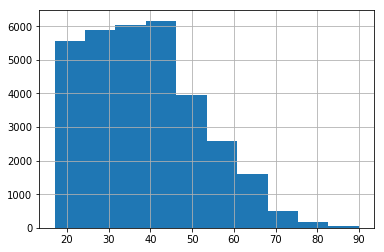

In [27]:
%matplotlib inline
base.age.hist()

In [28]:
import tensorflow as tf

In [29]:
idade = tf.feature_column.numeric_column('age')

In [30]:
idade_categorica = [tf.feature_column.bucketized_column(idade, boundaries = [20,30,40,50,60,70,80,90])]

In [31]:
print(idade_categorica)

[_BucketizedColumn(source_column=_NumericColumn(key='age', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), boundaries=(20, 30, 40, 50, 60, 70, 80, 90))]


In [32]:
X.columns

Index(['age', 'workclass', 'final-weight', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loos', 'hour-per-week', 'native-country'],
      dtype='object')

In [33]:
nome_colunas_categoricas = ['workclass','education', 'marital-status', 'occupation', 'relationship', 'race', 'sex','native-country']

In [34]:
X['sex'].unique()

array([' Male', ' Female'], dtype=object)

In [35]:
X['native-country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [37]:
colunas_categoricas = [tf.feature_column.categorical_column_with_vocabulary_list(key = c, vocabulary_list=X[c].unique()) for c in nome_colunas_categoricas]

In [42]:
print(colunas_categoricas[3])

_VocabularyListCategoricalColumn(key='occupation', vocabulary_list=(' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair', ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct', ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces', ' Priv-house-serv'), dtype=tf.string, default_value=-1, num_oov_buckets=0)


In [43]:
nome_colunas_numericas = [ 'final-weight','education-num','capital-gain', 'capital-loos', 'hour-per-week']

In [46]:
colunas_numericas = [tf.feature_column.numeric_column(key = c) for c in nome_colunas_numericas]

In [47]:
print(colunas_numericas[1])

_NumericColumn(key='education-num', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)


In [48]:
colunas = idade_categorica + colunas_categoricas + colunas_numericas

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [51]:
X_train.shape

(22792, 14)

In [52]:
X_test.shape

(9769, 14)

In [53]:
funcao_treinamento = tf.estimator.inputs.pandas_input_fn(x = X_train, y = y_train, batch_size=32,
                                                        num_epochs=None, shuffle=True)

In [54]:
classificador = tf.estimator.LinearClassifier(feature_columns=colunas)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpi2gz47ly', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f9038ef3198>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [55]:
classificador.train(input_fn=funcao_treinamento, steps = 10000)

Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpi2gz47ly/model.ckpt.
INFO:tensorflow:loss = 22.18071, step = 1
INFO:tensorflow:global_step/sec: 77.0339
INFO:tensorflow:loss = 13485.223, step = 101 (1.299 sec)
INFO:tensorflow:global_step/sec: 147.101
INFO:tensorflow:loss = 4041.4583, step = 201 (0.685 sec)
INFO:tensorflow:global_step/sec: 138.07
INFO:tensorflow:loss = 6150.3047, step = 301 (0.719 sec)
INFO:tensorflow:global_step/sec: 288.573
INFO:tensorflow:loss = 12521.877, step = 401 (0.347 sec)
INFO:t

INFO:tensorflow:loss = 165.86441, step = 7001 (0.616 sec)
INFO:tensorflow:global_step/sec: 193.112
INFO:tensorflow:loss = 5054.5713, step = 7101 (0.517 sec)
INFO:tensorflow:global_step/sec: 299.324
INFO:tensorflow:loss = 2452.7263, step = 7201 (0.334 sec)
INFO:tensorflow:global_step/sec: 298.76
INFO:tensorflow:loss = 377.49387, step = 7301 (0.335 sec)
INFO:tensorflow:global_step/sec: 178.35
INFO:tensorflow:loss = 35.901577, step = 7401 (0.563 sec)
INFO:tensorflow:global_step/sec: 189.963
INFO:tensorflow:loss = 3308.3113, step = 7501 (0.525 sec)
INFO:tensorflow:global_step/sec: 158.976
INFO:tensorflow:loss = 1666.5627, step = 7601 (0.628 sec)
INFO:tensorflow:global_step/sec: 161.319
INFO:tensorflow:loss = 2557.6528, step = 7701 (0.620 sec)
INFO:tensorflow:global_step/sec: 276.098
INFO:tensorflow:loss = 8317.911, step = 7801 (0.361 sec)
INFO:tensorflow:global_step/sec: 311.386
INFO:tensorflow:loss = 220.03369, step = 7901 (0.323 sec)
INFO:tensorflow:global_step/sec: 309.089
INFO:tensorfl

In [56]:
funcao_previsao = tf.estimator.inputs.pandas_input_fn(x = X_test, batch_size=32, shuffle=False)

In [57]:
previsoes = classificador.predict(input_fn=funcao_previsao)

In [58]:
list(previsoes)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpi2gz47ly/model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'logits': array([-293.7977], dtype=float32),
  'logistic': array([0.], dtype=float32),
  'probabilities': array([1., 0.], dtype=float32),
  'class_ids': array([0]),
  'classes': array([b'0'], dtype=object)},
 {'logits': array([-153.77892], dtype=float32),
  'logistic': array([0.], dtype=float32),
  'probabilities': array([1., 0.], dtype=float32),
  'class_ids': array([0]),
  'classes': array([b'0'], dtype=object)},
 {'logits': array([-194.81418], dtype=float32),
  'logistic': array([0.], dtype=float32),
  'probabilities': array([1., 0.], dtype=float32),
  'class_ids': array([0]),
  'classes': array([b'0'], dtype=object)},
 {'logits': array([-190.93388], dtype=float32),
  'logistic': array([0.], dtype=float32),
  'probabilities': array([1., 0.], dtype=float32),
  'class_ids': array([0]),
  'classes': array([b'0'], dtype=object)},
 {'logits': array([-208.68907], dtype=float32),
  'logistic': array([0.], dtype=float32),
  'probabilities': array([1., 0.], dtype=float32),
  'class_ids': a

In [60]:
previsoes_final = []
for p in classificador.predict(input_fn=funcao_previsao):
    previsoes_final.append(p['class_ids'])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpi2gz47ly/model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [61]:
previsoes_final

[array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([1]),
 array([0]),
 array([1]),
 array([1]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([1]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),

In [62]:
from sklearn.metrics import accuracy_score
taxa_acerto = accuracy_score(y_test, previsoes_final)

In [63]:
taxa_acerto

0.7961920360323472